# Real space topological markers using Tensor Networks

In [63]:
using LinearAlgebra
using Plots
using ITensors
include("../src/TopoTN.jl")

Main.TopoTN

## Application to a modulated $\pi-$ flux model

### Hamiltonian construction

Here we provide an example construction of the $\pi-$ flux model used in the main text of https://arxiv.org/pdf/2506.05230

To exemplify the construction with a modulated second neighbor hopping, we implement the $t_2=t_2^{(0)}\cos(x\pi/N_x)$ given in the SM, where $N_x$ is the number of sites in the $x-$ direction. Other Hamiltonians featuring different modulation profiles can be directly loaded.

In [4]:
# Building a pi-flux model

L_chain = 2^5
num_site = L_chain*L_chain
L = Int(log2(num_site))
sites = siteinds("S=1/2", L)
# Horizontal NN hoppings
Hintra = TopoTN.intrachain_hopping(L_chain, num_site, sites, t = 1)

# pi-flux
hop = TopoTN.get_sz_quantics(L,sites)

# Modulating function
#function cosx(i)
#    return cos(mod(i,L_chain)*pi/L_chain)
#end

#MPOcos = TopoTN.get_diagonal_mpo(L,sites, cosx)
hop1 = hop



#Switch for cosine modulation
#hop2 = apply(MPOcos, hop1)
hop2 = hop

# Vertical NN hoppings
Hinter = TopoTN.interchain_hopping_square(L_chain, num_site, sites, hopping=hop1, t=1)
t2 = 0.2

# NNN hoppings
Hinter2 = TopoTN.interchain_hopping_square_2nd_minus(L_chain, num_site, sites, hopping = hop2, t2 = t2*1im) +TopoTN.interchain_hopping_square_2nd_plus(L_chain, num_site, sites, hopping=hop2, t2 = -t2*1im) 
H = Hinter+Hintra+Hinter2

MPO
[1] ((dim=2|id=150|"S=1/2,Site,n=1")', (dim=2|id=150|"S=1/2,Site,n=1"), (dim=9|id=452|"l=1,link"))
[2] ((dim=2|id=181|"S=1/2,Site,n=2")', (dim=2|id=181|"S=1/2,Site,n=2"), (dim=9|id=78|"l=2,link"), (dim=9|id=452|"l=1,link"))
[3] ((dim=2|id=178|"S=1/2,Site,n=3")', (dim=2|id=178|"S=1/2,Site,n=3"), (dim=9|id=598|"l=3,link"), (dim=9|id=78|"l=2,link"))
[4] ((dim=2|id=677|"S=1/2,Site,n=4")', (dim=2|id=677|"S=1/2,Site,n=4"), (dim=8|id=179|"l=4,link"), (dim=9|id=598|"l=3,link"))
[5] ((dim=2|id=643|"S=1/2,Site,n=5")', (dim=2|id=643|"S=1/2,Site,n=5"), (dim=6|id=40|"l=5,link"), (dim=8|id=179|"l=4,link"))
[6] ((dim=2|id=225|"S=1/2,Site,n=6")', (dim=2|id=225|"S=1/2,Site,n=6"), (dim=7|id=731|"l=6,link"), (dim=6|id=40|"l=5,link"))
[7] ((dim=2|id=951|"S=1/2,Site,n=7")', (dim=2|id=951|"S=1/2,Site,n=7"), (dim=7|id=973|"l=7,link"), (dim=7|id=731|"l=6,link"))
[8] ((dim=2|id=421|"S=1/2,Site,n=8")', (dim=2|id=421|"S=1/2,Site,n=8"), (dim=7|id=277|"l=8,link"), (dim=7|id=973|"l=7,link"))
[9] ((dim=2|id=901|

In [3]:
# Alternatively load and save MPOs

using HDF5

# Save an MPO (or any ITensor object) to an HDF5 file
function save_H(filename, H; dataset="H")
  h5open(filename, "w") do f
    write(f, dataset, H)
  end
  return nothing
end

# Load an MPO from an HDF5 file
function load_H(filename; dataset="H")
  return h5open(filename, "r") do f
    read(f, dataset, MPO)
  end
end


# Change to other provided example Hamiltonians here -- be careful to adapt the value of L and other necessary parameters

#This loads the pi-flux model with t2=0.2cos(pi x/N_x)$
H = load_H("H_piflux_modpi_mpo.h5")
vec = siteinds(H)
sites = [pair[2] for pair in vec]

12-element Vector{Index{Int64}}:
 (dim=2|id=284|"S=1/2,Site,n=1")
 (dim=2|id=67|"S=1/2,Site,n=2")
 (dim=2|id=21|"S=1/2,Site,n=3")
 (dim=2|id=65|"S=1/2,Site,n=4")
 (dim=2|id=550|"S=1/2,Site,n=5")
 (dim=2|id=810|"S=1/2,Site,n=6")
 (dim=2|id=610|"S=1/2,Site,n=7")
 (dim=2|id=721|"S=1/2,Site,n=8")
 (dim=2|id=847|"S=1/2,Site,n=9")
 (dim=2|id=122|"S=1/2,Site,n=10")
 (dim=2|id=473|"S=1/2,Site,n=11")
 (dim=2|id=337|"S=1/2,Site,n=12")

### KPM

In [5]:
using ITensorMPS

# Scaling factor used for KPM
factor = 6

# List of Chebyshev polynomials of H
Tnlist = TopoTN.KPM_Tn(H/factor, 100, sites, maxdim = 100)

# Density matrix
P = TopoTN.get_density_from_Tn(Tnlist, 100, fermi = 0, maxdim = 100)

15
28
34
36
37
50
43
56
57
68
67
81
76
89
89
94
96
99
99
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100


MPO
[1] ((dim=2|id=150|"S=1/2,Site,n=1")', (dim=2|id=150|"S=1/2,Site,n=1"), (dim=4|id=385|"Link,l=1"))
[2] ((dim=2|id=181|"S=1/2,Site,n=2")', (dim=2|id=181|"S=1/2,Site,n=2"), (dim=11|id=604|"Link,l=2"), (dim=4|id=385|"Link,l=1"))
[3] ((dim=2|id=178|"S=1/2,Site,n=3")', (dim=2|id=178|"S=1/2,Site,n=3"), (dim=21|id=823|"Link,l=3"), (dim=11|id=604|"Link,l=2"))
[4] ((dim=2|id=677|"S=1/2,Site,n=4")', (dim=2|id=677|"S=1/2,Site,n=4"), (dim=34|id=555|"Link,l=4"), (dim=21|id=823|"Link,l=3"))
[5] ((dim=2|id=643|"S=1/2,Site,n=5")', (dim=2|id=643|"S=1/2,Site,n=5"), (dim=46|id=84|"Link,l=5"), (dim=34|id=555|"Link,l=4"))
[6] ((dim=2|id=225|"S=1/2,Site,n=6")', (dim=2|id=225|"S=1/2,Site,n=6"), (dim=82|id=828|"Link,l=6"), (dim=46|id=84|"Link,l=5"))
[7] ((dim=2|id=951|"S=1/2,Site,n=7")', (dim=2|id=951|"S=1/2,Site,n=7"), (dim=58|id=400|"Link,l=7"), (dim=82|id=828|"Link,l=6"))
[8] ((dim=2|id=421|"S=1/2,Site,n=8")', (dim=2|id=421|"S=1/2,Site,n=8"), (dim=16|id=778|"Link,l=8"), (dim=58|id=400|"Link,l=7"))
[9] 

### Chern operator

In [8]:
xs = Vector{Float64}(undef, num_site);
ys = Vector{Float64}(undef, num_site);
cs = Vector{Float64}(undef, num_site);
ρs = Vector{Float64}(undef, num_site);

In [10]:
xfunc(alpha, L_chain) = mod(alpha, L_chain)
yfunc(alpha, L_chain) = div(alpha, L_chain)

cr = TopoTN.get_C_op_MPO_from_P_quenched(P, L, sites, xfunc, yfunc; Λ=10, maxdim=500)

op done
C1 done
C2 done
C3 done
C4 done


(::Main.TopoTN.var"#calculate_chern_number#57"{Int64, Int64, Vector{Index{Int64}}, typeof(xfunc), typeof(yfunc), Int64}) (generic function with 1 method)

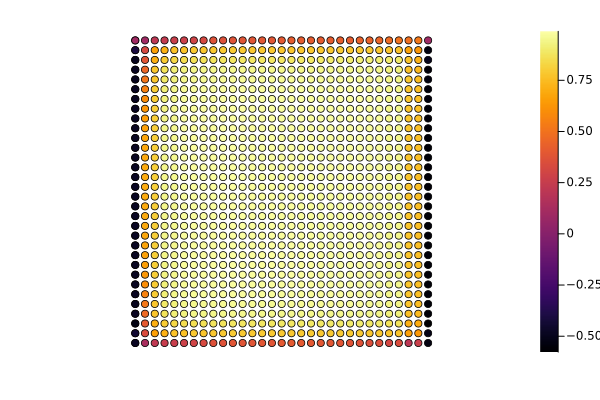

In [35]:
for i in 1:num_site
    xs[i] = xfunc(i-1, L_chain)
    ys[i] = yfunc(i-1, L_chain)
    cs[i] = real(cr(i))
end

xs_wrapped = copy(xs)
xs_wrapped[xs_wrapped .== 0] .= L_chain - 1
xs_wrapped[xs_wrapped .== L_chain - 1] .= 0

scatter(xs_wrapped, ys;
    marker_z = cs,
    axis = false,       
    grid = false, 
    aspect_ratio = 1,
    legend = false,
    colorbar = true
)


### LDoS

In [13]:
ρw = TopoTN.get_ldos_w_from_Tn(Tnlist,100,0,maxdim=100)

MPO
[1] ((dim=2|id=150|"S=1/2,Site,n=1")', (dim=2|id=150|"S=1/2,Site,n=1"), (dim=4|id=772|"Link,l=1"))
[2] ((dim=2|id=181|"S=1/2,Site,n=2")', (dim=2|id=181|"S=1/2,Site,n=2"), (dim=16|id=159|"Link,l=2"), (dim=4|id=772|"Link,l=1"))
[3] ((dim=2|id=178|"S=1/2,Site,n=3")', (dim=2|id=178|"S=1/2,Site,n=3"), (dim=50|id=894|"Link,l=3"), (dim=16|id=159|"Link,l=2"))
[4] ((dim=2|id=677|"S=1/2,Site,n=4")', (dim=2|id=677|"S=1/2,Site,n=4"), (dim=81|id=507|"Link,l=4"), (dim=50|id=894|"Link,l=3"))
[5] ((dim=2|id=643|"S=1/2,Site,n=5")', (dim=2|id=643|"S=1/2,Site,n=5"), (dim=100|id=426|"Link,l=5"), (dim=81|id=507|"Link,l=4"))
[6] ((dim=2|id=225|"S=1/2,Site,n=6")', (dim=2|id=225|"S=1/2,Site,n=6"), (dim=100|id=462|"Link,l=6"), (dim=100|id=426|"Link,l=5"))
[7] ((dim=2|id=951|"S=1/2,Site,n=7")', (dim=2|id=951|"S=1/2,Site,n=7"), (dim=64|id=415|"Link,l=7"), (dim=100|id=462|"Link,l=6"))
[8] ((dim=2|id=421|"S=1/2,Site,n=8")', (dim=2|id=421|"S=1/2,Site,n=8"), (dim=16|id=389|"Link,l=8"), (dim=64|id=415|"Link,l=7")

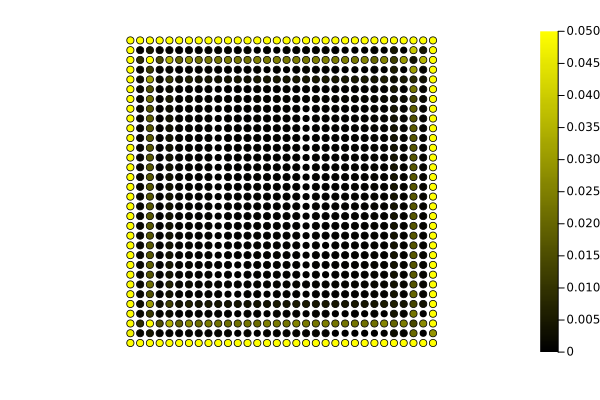

In [38]:
for i in 1:num_site
    xs[i] = xfunc(i-1, L_chain)
    ys[i] = yfunc(i-1, L_chain)
    mpsi = TopoTN.binary_to_MPS(i-1, L, sites)
    ρs[i] = real(inner(mpsi, ρw, mpsi))
end

xs_wrapped = copy(xs)
xs_wrapped[xs_wrapped .== 0] .= L_chain


black_yellow = cgrad([:black, :yellow])
scatter(xs_wrapped, ys;
    c = black_yellow,
    marker_z = ρs,
    axis = false,       
    grid = false, 
    aspect_ratio = 1,
    legend = false,
    colorbar = true,
    clim = (0,0.05)
)

## Application to the Haldane model

### Hamiltonian Construction

In [51]:
l=5
L = 2 * l
L_chain = 2^l
num_site = 2^L
sites = siteinds("Qubit", L)
xvals = range(1, num_site; length=num_site)


H = TopoTN.Haldane_MPO(l, sites, 0.2, pi/2; M=0)

MPO
[1] ((dim=2|id=459|"Qubit,Site,n=1")', (dim=2|id=459|"Qubit,Site,n=1"), (dim=8|id=730|"Link,l=1"))
[2] ((dim=2|id=773|"Qubit,Site,n=2")', (dim=2|id=773|"Qubit,Site,n=2"), (dim=8|id=801|"Link,l=2"), (dim=8|id=730|"Link,l=1"))
[3] ((dim=2|id=584|"Qubit,Site,n=3")', (dim=2|id=584|"Qubit,Site,n=3"), (dim=8|id=981|"Link,l=3"), (dim=8|id=801|"Link,l=2"))
[4] ((dim=2|id=138|"Qubit,Site,n=4")', (dim=2|id=138|"Qubit,Site,n=4"), (dim=8|id=943|"Link,l=4"), (dim=8|id=981|"Link,l=3"))
[5] ((dim=2|id=49|"Qubit,Site,n=5")', (dim=2|id=49|"Qubit,Site,n=5"), (dim=8|id=156|"Link,l=5"), (dim=8|id=943|"Link,l=4"))
[6] ((dim=2|id=842|"Qubit,Site,n=6")', (dim=2|id=842|"Qubit,Site,n=6"), (dim=14|id=725|"Link,l=6"), (dim=8|id=156|"Link,l=5"))
[7] ((dim=2|id=763|"Qubit,Site,n=7")', (dim=2|id=763|"Qubit,Site,n=7"), (dim=14|id=716|"Link,l=7"), (dim=14|id=725|"Link,l=6"))
[8] ((dim=2|id=943|"Qubit,Site,n=8")', (dim=2|id=943|"Qubit,Site,n=8"), (dim=12|id=775|"Link,l=8"), (dim=14|id=716|"Link,l=7"))
[9] ((dim=2|

In [52]:
using ITensorMPS

#Scaling factor used for KPM
factor = 6
Tnlist = TopoTN.KPM_Tn(H/factor, 100, sites, maxdim = 100)
P = TopoTN.get_density_from_Tn(Tnlist, 100, fermi = 0, maxdim = 100)

23
39
37
47
46
53
51
64
61
73
69
81
75
89
86
95
92
99
97
100
99
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100


MPO
[1] ((dim=2|id=459|"Qubit,Site,n=1")', (dim=2|id=459|"Qubit,Site,n=1"), (dim=4|id=974|"Link,l=1"))
[2] ((dim=2|id=773|"Qubit,Site,n=2")', (dim=2|id=773|"Qubit,Site,n=2"), (dim=5|id=780|"Link,l=2"), (dim=4|id=974|"Link,l=1"))
[3] ((dim=2|id=584|"Qubit,Site,n=3")', (dim=2|id=584|"Qubit,Site,n=3"), (dim=12|id=398|"Link,l=3"), (dim=5|id=780|"Link,l=2"))
[4] ((dim=2|id=138|"Qubit,Site,n=4")', (dim=2|id=138|"Qubit,Site,n=4"), (dim=25|id=162|"Link,l=4"), (dim=12|id=398|"Link,l=3"))
[5] ((dim=2|id=49|"Qubit,Site,n=5")', (dim=2|id=49|"Qubit,Site,n=5"), (dim=40|id=388|"Link,l=5"), (dim=25|id=162|"Link,l=4"))
[6] ((dim=2|id=842|"Qubit,Site,n=6")', (dim=2|id=842|"Qubit,Site,n=6"), (dim=87|id=878|"Link,l=6"), (dim=40|id=388|"Link,l=5"))
[7] ((dim=2|id=763|"Qubit,Site,n=7")', (dim=2|id=763|"Qubit,Site,n=7"), (dim=62|id=401|"Link,l=7"), (dim=87|id=878|"Link,l=6"))
[8] ((dim=2|id=943|"Qubit,Site,n=8")', (dim=2|id=943|"Qubit,Site,n=8"), (dim=16|id=424|"Link,l=8"), (dim=62|id=401|"Link,l=7"))
[9] ((

### Chern operator

In [64]:
function xh(x)
    base = (div(x + 1, 2) * 0.5)
    return base
end

function yh(x, y)
    base = sqrt(3)/2 * (2y + ((x % 4 == 0) || (x % 4 == 3)))
    return base
end

function make_x_y(Lchain)
    x(alpha) = mod(alpha, Lchain)
    y(alpha) = div(alpha, Lchain)
    xfunc(alpha, Lchain) = xh(x(alpha))
    yfunc(alpha, Lchain) = yh(x(alpha), y(alpha))
    return xfunc, yfunc
end

xfuncH, yfuncH = make_x_y(L_chain);

In [65]:
cr = TopoTN.get_C_op_MPO_from_P_quenched(P, L, sites, xfuncH, yfuncH; Λ=10, maxdim=500)

op done
C1 done
C2 done
C3 done
C4 done


(::Main.TopoTN.var"#calculate_chern_number#79"{Int64, Int64, Vector{Index{Int64}}, var"#xfunc#27"{var"#x#25"{Int64}}, var"#yfunc#28"{var"#y#26"{Int64}, var"#x#25"{Int64}}, Int64}) (generic function with 1 method)

In [70]:
i = 8+6*16 #Center
cri = cr(i)
cri2 = cr(i+1)
Vc = sqrt(3)/2 #Normalization due to position operator scaling
println("Position 1: (", xfuncH(i-1, L_chain), ", ", yfuncH(i-1, L_chain), ")\n Chern: ", cri)
println("Position 2: (", xfuncH(i, L_chain), ", ", yfuncH(i, L_chain), ")\n Chern: ", cri2)
println("Normalized sum: ", (cri+cri2)/Vc)

Position 1: (2.0, 6.06217782649107)
 Chern: 0.4285762113554355 + 0.00024073980976139714im
Position 2: (2.0, 6.06217782649107)
 Chern: 0.42834370674570493 + 0.0006537433351956804im
Normalized sum: 0.989485890779291 + 0.0010328601690531036im


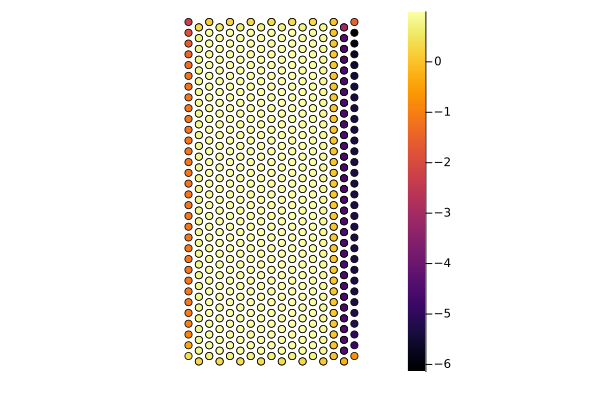

In [98]:
xs = Vector{Float64}(undef, num_site)
ys = Vector{Float64}(undef, num_site)
cs = Vector{Float64}(undef, num_site)
ρs = Vector{Float64}(undef, num_site)

for i in 1:num_site
    xs[i] = xfuncH(i-1, L_chain)
    ys[i] = yfuncH(i-1, L_chain)
    rmid_mps = TopoTN.binary_to_MPS(i-1, L, sites)
    cs[i] = real((cr(i-1) + cr(i))/Vc)  # cr must already be defined from make_cr_function
end

scatter(xs, ys;
    marker_z = cs,
    axis = false,
    aspect_ratio = 0.3,       
    grid = false, 
    legend = false,
    colorbar = true,
    xlim = (-1,10)
)

### LDoS

In [82]:
ρw = TopoTN.get_ldos_w_from_Tn(Tnlist,100,0,maxdim=100)

MPO
[1] ((dim=2|id=459|"Qubit,Site,n=1")', (dim=2|id=459|"Qubit,Site,n=1"), (dim=4|id=669|"Link,l=1"))
[2] ((dim=2|id=773|"Qubit,Site,n=2")', (dim=2|id=773|"Qubit,Site,n=2"), (dim=11|id=230|"Link,l=2"), (dim=4|id=669|"Link,l=1"))
[3] ((dim=2|id=584|"Qubit,Site,n=3")', (dim=2|id=584|"Qubit,Site,n=3"), (dim=21|id=127|"Link,l=3"), (dim=11|id=230|"Link,l=2"))
[4] ((dim=2|id=138|"Qubit,Site,n=4")', (dim=2|id=138|"Qubit,Site,n=4"), (dim=52|id=803|"Link,l=4"), (dim=21|id=127|"Link,l=3"))
[5] ((dim=2|id=49|"Qubit,Site,n=5")', (dim=2|id=49|"Qubit,Site,n=5"), (dim=89|id=281|"Link,l=5"), (dim=52|id=803|"Link,l=4"))
[6] ((dim=2|id=842|"Qubit,Site,n=6")', (dim=2|id=842|"Qubit,Site,n=6"), (dim=100|id=131|"Link,l=6"), (dim=89|id=281|"Link,l=5"))
[7] ((dim=2|id=763|"Qubit,Site,n=7")', (dim=2|id=763|"Qubit,Site,n=7"), (dim=64|id=178|"Link,l=7"), (dim=100|id=131|"Link,l=6"))
[8] ((dim=2|id=943|"Qubit,Site,n=8")', (dim=2|id=943|"Qubit,Site,n=8"), (dim=16|id=984|"Link,l=8"), (dim=64|id=178|"Link,l=7"))
[9

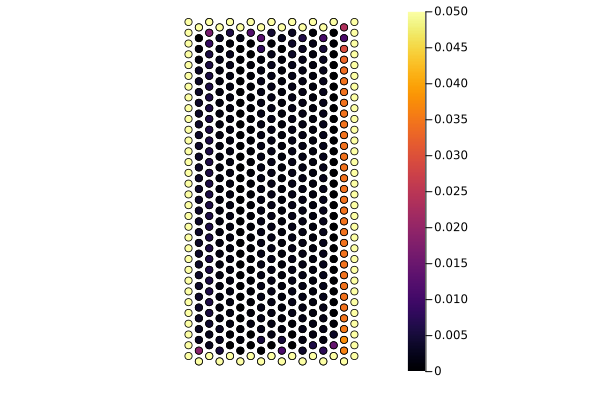

In [ ]:
for i in 1:num_site
    xs[i] = xfuncH(i-1, L_chain)
    ys[i] = yfuncH(i-1, L_chain)
    mpsi = TopoTN.binary_to_MPS(i-1, L, sites)
    ρs[i] = real(inner(mpsi, ρw, mpsi))  # cr must already be defined from make_cr_function
end


scatter(xs, ys;
    marker_z = ρs,
    axis = false,       
    grid = false, 
    aspect_ratio = 0.3,
    legend = false,
    colorbar = true,
    clim = (0.0,0.05),
    xlim = (-1,10)
)